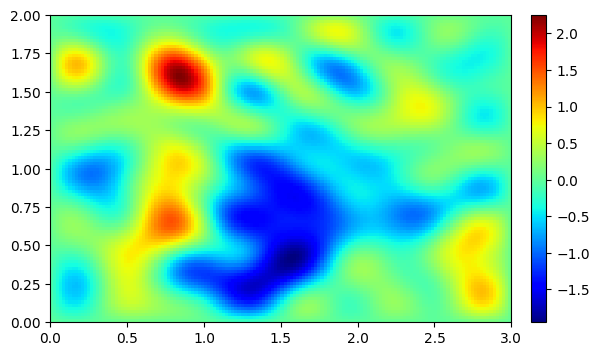

PyObject <matplotlib.colorbar.Colorbar object at 0x7fcd6a5d44e0>

In [1]:
using Random, Distributions, PyPlot
dim = [150,100] # x and y dimensions of the numerical system
bsize = [3.,2.] # box size
dr = bsize ./ (dim .+ 1) # calculate the spatial discretization
x, y = (1:dim[1])*dr[1], (1:dim[2])*dr[2] # Create iterators for x and y coordinates
X, Y = x * ones(dim[2])', ones(dim[1]) * y' # 2d meshes for function evaluation
d = Normal(0, 1.) # Define normal distribution with 0 mean and variance 1
eigx, eigy = (1:dim[1])*π/bsize[1], (1:dim[2])*π/bsize[2] # iterators for eigenvalues
f = zeros((dim[1],dim[2])) # Create an empty array for the input of the Poisson equation
for n in 1:10, k in 1:10
    f .+= rand(d)*sin.(eigx[n]*X) .* sin.(eigy[k]*Y)/sqrt(eigx[n]^2 + eigy[k]^2) # Create a smooth random potential
end
fig, ax = subplots()
plot = ax.imshow(f',cmap="jet",origin="lower", extent = [0,bsize[1],0,bsize[2]]) # Plot f
fig.colorbar(plot, ax=ax, fraction=0.031, pad=0.04)

In [2]:
using LinearAlgebra
# Create matrices for 2nd order derivatives for x and y
Lx = (-2*diagm(0 => ones(dim[1])) + diagm(1 => ones(dim[1]-1)) + diagm(-1 => ones(dim[1]-1))) / dr[1]^2
Ly = (-2*diagm(0 => ones(dim[2])) + diagm(1 => ones(dim[2]-1)) + diagm(-1 => ones(dim[2]-1))) / dr[2]^2
Iy = diagm(0 => ones(dim[1])) / dr[2]^2 # The Iy matrix
B = Lx .- 2*Iy # Matrix on the diagonal of the block form
A = zeros((dim[1]*dim[2], dim[1]*dim[2])) # empty block matrix
# insert the block matrices in the beginning and end
A[1:dim[1],1:dim[1]] = B
A[1:dim[1],dim[1]+1:2*dim[1]] = Iy
A[(dim[2]-1)*dim[1]+1:end,(dim[2]-1)*dim[1]+1:end] = B
A[(dim[2]-1)*dim[1]+1:end,(dim[2]-2)*dim[1]+1:(dim[2]-1)*dim[1]] = Iy
# Insert the rest of the block matrices
for j in 2:dim[2]-1
    A[1+(j-1)*dim[1]:j*dim[1],1+(j-2)*dim[1]:(j-1)*dim[1]] = Iy
    A[1+(j-1)*dim[1]:j*dim[1],1+(j-1)*dim[1]:(j)*dim[1]] = B
    A[1+(j-1)*dim[1]:j*dim[1],1+(j)*dim[1]:(j+1)*dim[1]] = Iy
end

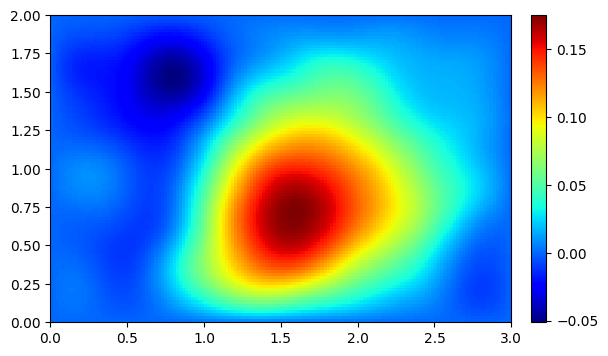

PyObject <matplotlib.colorbar.Colorbar object at 0x7fcc86f06a58>

In [3]:
u = A\f[:] # Solve the linear system, notice that f[:] flattens the array f
u = reshape(u,(dim[1],dim[2])) # We reshape the solution in a matrix format
fig, ax = subplots()
plot = ax.imshow(u',cmap="jet",origin="lower", extent = [0,bsize[1],0,bsize[2]]) # plot the solution
fig.colorbar(plot, ax=ax, fraction=0.031, pad=0.04)

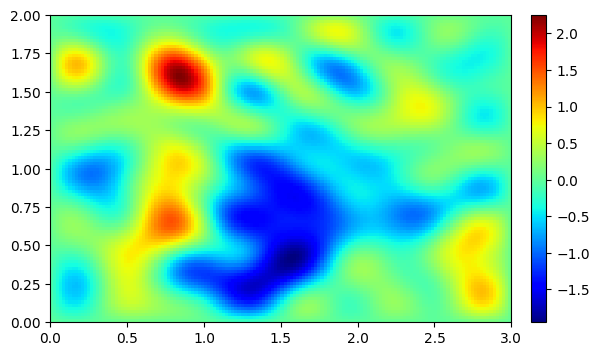

PyObject <matplotlib.colorbar.Colorbar object at 0x7fcc86e3c4a8>

In [4]:
r = A*u[:] # Check the solution
r = reshape(r,(dim[1],dim[2]))
fig, ax = subplots()
plot = ax.imshow(r',cmap="jet",origin="lower", extent = [0,bsize[1],0,bsize[2]])
fig.colorbar(plot, ax=ax, fraction=0.031, pad=0.04)

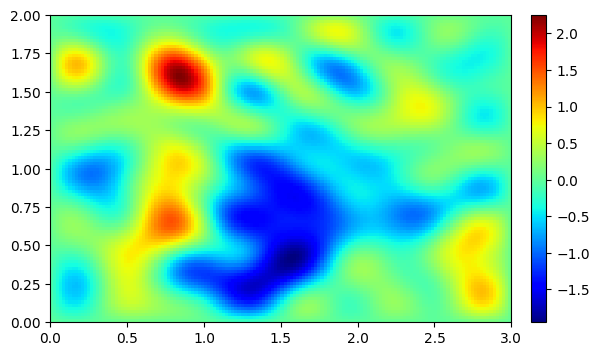

PyObject <matplotlib.colorbar.Colorbar object at 0x7fcc86d6df28>

In [5]:
r = Lx*u .+ u*Ly # Another check
r = reshape(r,(dim[1],dim[2]))
fig, ax = subplots()
plot = ax.imshow(r',cmap="jet",origin="lower", extent = [0,bsize[1],0,bsize[2]])
fig.colorbar(plot, ax=ax, fraction=0.031, pad=0.04)

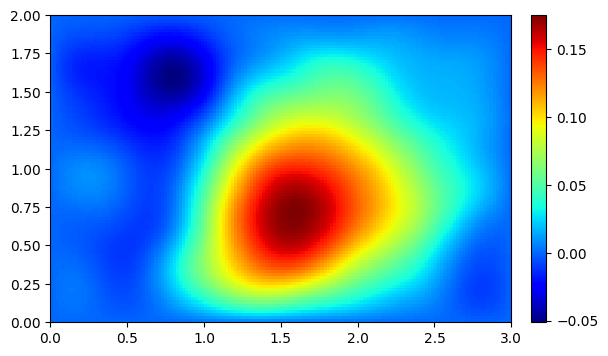

PyObject <matplotlib.colorbar.Colorbar object at 0x7fcc768329e8>

In [6]:
using SparseArrays
As = sparse(A)
us = As\f[:] # Solve the linear system, notice that f[:] flattens the array f
us = reshape(u,(dim[1],dim[2])) # We reshape the solution in a matrix format
fig, ax = subplots()
plot = ax.imshow(us',cmap="jet",origin="lower", extent = [0,bsize[1],0,bsize[2]]) # plot the solution
fig.colorbar(plot, ax=ax, fraction=0.031, pad=0.04)

In [8]:
As

15000×15000 SparseMatrixCSC{Float64,Int64} with 74500 stored entries:
  [1    ,     1]  =  -10167.4
  [2    ,     1]  =  2533.44
  [151  ,     1]  =  2550.25
  [1    ,     2]  =  2533.44
  [2    ,     2]  =  -10167.4
  [3    ,     2]  =  2533.44
  [152  ,     2]  =  2550.25
  [2    ,     3]  =  2533.44
  [3    ,     3]  =  -10167.4
  [4    ,     3]  =  2533.44
  [153  ,     3]  =  2550.25
  [3    ,     4]  =  2533.44
  ⋮
  [14997, 14997]  =  -10167.4
  [14998, 14997]  =  2533.44
  [14848, 14998]  =  2550.25
  [14997, 14998]  =  2533.44
  [14998, 14998]  =  -10167.4
  [14999, 14998]  =  2533.44
  [14849, 14999]  =  2550.25
  [14998, 14999]  =  2533.44
  [14999, 14999]  =  -10167.4
  [15000, 14999]  =  2533.44
  [14850, 15000]  =  2550.25
  [14999, 15000]  =  2533.44
  [15000, 15000]  =  -10167.4